<a href="https://colab.research.google.com/github/AmimaShifa/Breast-Cancer-Prediction-Using-KNN-Algorithm/blob/main/ML_MODEL_Breast_Cancer_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
from google.colab import files #to upload data set
uploaded = files.upload()
df = pd.read_csv('Breast-Cancer.csv') #Used to read comma seperated value file and store it in pandas dataframe
df.replace('?',-99999,inplace = True) #replacing missing values denoted by '?' with -99999 in df variable itself
df.drop(['id'],axis=1,inplace=True) #removing the column (axis = 1 means column) 'id' as it is not needed for processing
full_data = df.astype(float).values.tolist() #Converting dataframe into a normal list for further processing
full_data#to print the data set


Saving Breast-Cancer.csv to Breast-Cancer (1).csv


[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0],
 [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [5.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 7.0, 5.0, 10.0, 7.0, 9.0, 5.0, 5.0, 4.0, 4.0],
 [7.0, 4.0, 6.0, 4.0, 6.0, 1.0, 4.0, 3.0, 1.0, 4.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [10.0, 7.0, 7.0, 6.0, 4.0, 10.0, 4.0, 1

In [8]:
import random
random.shuffle(full_data) #We shuffle our data so that we get some uniformity in the examples used as train and test data
#That is to say that we shouldn't have all examples of only a single class in the test data
#TRAIN-TEST-SPLIT
test_size = 0.2

train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]
len(train_data) #each list inside main list has 10 elements i.e. 9 features and 1 label, same for test data

560

In [9]:
len(full_data)


699

In [10]:
train_set = {2:[],4:[]} #We need our dataset in dictionary format so that we can use it in KNN function
test_set = {2:[],4:[]}
for i in train_data:
    train_set[i[-1]].append(i[:-1])#apart from last column
    #We took one-one list from train_data and appended the features from that list into dictionary 
    #with key as last element (label) of that list
for i in test_data:
    test_set[i[-1]].append(i[:-1]) #same process repeated for test data
train_set


{2: [[3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 7.0, 1.0, 1.0],
  [4.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [4.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [6.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [5.0, 2.0, 2.0, 4.0, 2.0, 4.0, 1.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [6.0, 2.0, 1.0, 1.0, 1.0, 1.0, 7.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [8.0, 2.0, 1.0,

In [12]:
#KNN ALGORITHM
def knn(data,predict,k=3): #We define function so that we can reuse it afterwards for new dataset
    distances = []
    for label in data: #r
        for featureset in data[label]:
            distance = np.linalg.norm(np.array(featureset)-np.array(predict))
            distances.append([distance,label])
    votes = [i[1] for i in sorted(distances)[0:k]]
    vote_result = Counter(votes).most_common(1)[0][0] #most common is function
    return vote_result
knn(train_set,[5,10,10,5,4,5,4,4,1],11) #passing a single data [5,10,10,5,4,5,4,4,1] for prediction 
#if tumor is benign (2) or malignant (4)


4

In [13]:
accuracy = [] #list to append accuracy in
z = [i for i in range(1,100,2)] #list of all values of k used below
for k in range(1,100,2):
    correct = 0
    total = len(test_data)
    for group in test_set:
        for data in test_set[group]: #data contains a list of 9 features x1,x2...x9
            vote = knn(train_set,data,k) #we check classification made by knn for data variable
            if group == vote: #if group of data variable = classification made by knn then correct += 1
                correct+=1
    accuracy.append(correct/total)

0.9712230215827338 5


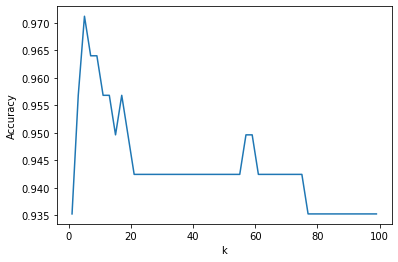

In [16]:
#Accuracy list will have some accuracy at 0th index for k =1, at 1st index for k =2 and at nth index for k = n+1
print(max(accuracy),z[accuracy.index(max(accuracy))]) #printing maximum accuracy and first value of kfor which it occurs
#PLOTTING ACCURACY VS. K graph for analysis of performance of KNN on breast cancer classification problem
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.plot(z,accuracy) 
#Plot functions gives a continuous line over all points in z (list of x coordinate) and accuracy (list of y coordinate)
plt.show() #shows the plot

In [17]:
final_k=z[accuracy.index(max(accuracy))]
final_k

5